In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar el CSV
dtoff = pd.read_csv('..\data\processed_data.csv')

# Explorar los datos
print("=== EXPLORACIÓN DE DATOS ===")
print(f"Dimensiones del dataset: {dtoff.shape}")
print(f"\nPrimeras 5 filas:")
print(dtoff.head())
print(f"\nTipos de datos:")
print(dtoff.dtypes)
print(f"\nEstadísticas descriptivas:")
print(dtoff.describe())

# Ver si hay valores nulos
print(f"\nValores nulos por columna:")
print(dtoff.isnull().sum())

=== EXPLORACIÓN DE DATOS ===
Dimensiones del dataset: (374, 16)

Primeras 5 filas:
   Unnamed: 0  Person ID  Gender  Age            Occupation  Sleep Duration  \
0           0          1       1   27     Software Engineer             6.1   
1           1          2       1   28                Doctor             6.2   
2           2          3       1   28                Doctor             6.2   
3           3          4       1   28  Sales Representative             5.9   
4           4          5       1   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level  BMI Category  \
0                 6                       42             6             2   
1                 6                       60             8             1   
2                 6                       60             8             1   
3                 4                       30             8             3   
4                 4                       30             8    

<>:10: SyntaxWarning:

invalid escape sequence '\d'

<>:10: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\angel\AppData\Local\Temp\ipykernel_42072\2684324150.py:10: SyntaxWarning:

invalid escape sequence '\d'



In [33]:
df = dtoff.drop(columns=['Person ID', 'Daily Steps', 'Physical Activity Level', 'Unnamed: 0'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,27,Software Engineer,6.1,6,6,2,126/83,77,0,126,83
1,1,28,Doctor,6.2,6,8,1,125/80,75,0,125,80
2,1,28,Doctor,6.2,6,8,1,125/80,75,0,125,80
3,1,28,Sales Representative,5.9,4,8,3,140/90,85,1,140,90
4,1,28,Sales Representative,5.9,4,8,3,140/90,85,1,140,90


In [34]:
# Seleccionar solo columnas numéricas
df_numerico = df.select_dtypes(include=[np.number])

print(f"\n=== DATOS NUMÉRICOS PARA PCA ===")
print(f"Dimensiones: {df_numerico.shape}")
print(f"Columnas numéricas: {list(df_numerico.columns)}")

# Estandarizar los datos (CRUCIAL para PCA)
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(df_numerico)

print("Datos estandarizados - forma:", datos_estandarizados.shape)


=== DATOS NUMÉRICOS PARA PCA ===
Dimensiones: (374, 10)
Columnas numéricas: ['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level', 'BMI Category', 'Heart Rate', 'Sleep Disorder', 'Systolic Pressure', 'Diastolic Pressure']
Datos estandarizados - forma: (374, 10)


In [35]:
# Aplicar PCA
pca = PCA()
componentes_principales = pca.fit_transform(datos_estandarizados)

# Crear DataFrame con componentes principales
pca_df = pd.DataFrame(data=componentes_principales, 
                     columns=[f'PC{i+1}' for i in range(componentes_principales.shape[1])])

# Análisis de varianza
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("\n=== ANÁLISIS DE VARIANZA PCA ===")
print(f"Varianza explicada por los primeros 5 componentes:")
for i in range(5):
    print(f"PC{i+1}: {varianza_explicada[i]:.3f} ({varianza_explicada[i]:.2%})")

print(f"\nVarianza acumulada:")
for i in [1, 2, 3, 5, 10]:
    if i <= len(varianza_acumulada):
        print(f"Primeros {i} componentes: {varianza_acumulada[i-1]:.2%}")


=== ANÁLISIS DE VARIANZA PCA ===
Varianza explicada por los primeros 5 componentes:
PC1: 0.417 (41.73%)
PC2: 0.348 (34.79%)
PC3: 0.081 (8.11%)
PC4: 0.047 (4.67%)
PC5: 0.042 (4.21%)

Varianza acumulada:
Primeros 1 componentes: 41.73%
Primeros 2 componentes: 76.52%
Primeros 3 componentes: 84.63%
Primeros 5 componentes: 93.51%
Primeros 10 componentes: 100.00%


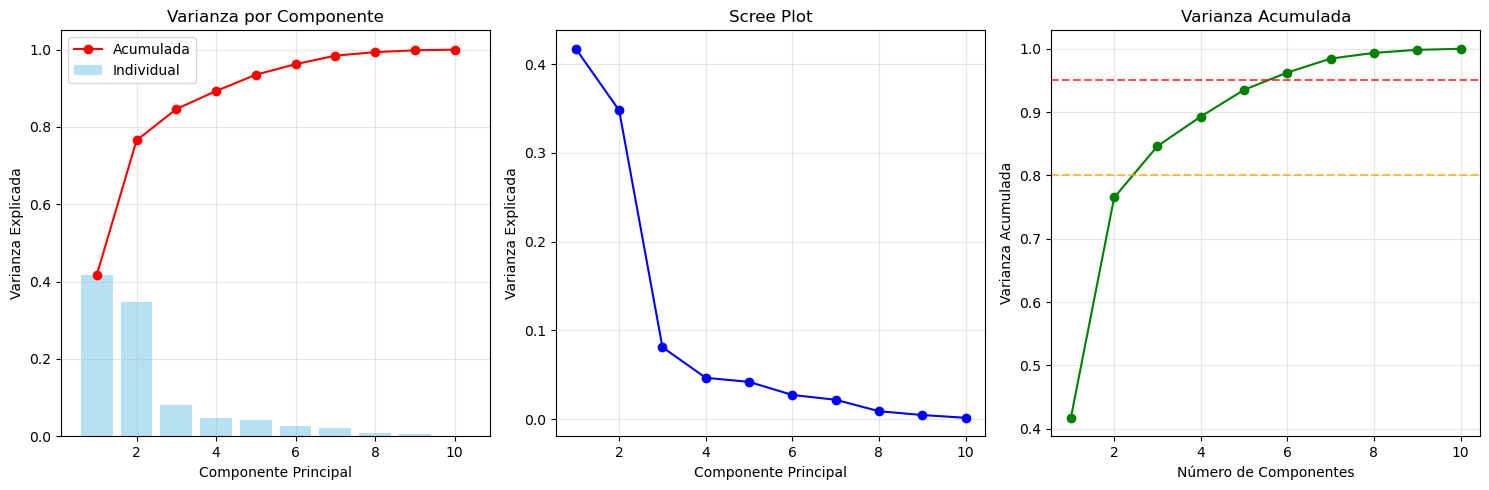

In [36]:
# Gráficos de varianza
plt.figure(figsize=(15, 5))

# Gráfico 1: Varianza explicada
plt.subplot(1, 3, 1)
componentes = range(1, len(varianza_explicada) + 1)
plt.bar(componentes, varianza_explicada, alpha=0.6, color='skyblue')
plt.plot(componentes, varianza_acumulada, 'ro-')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza por Componente')
plt.legend(['Acumulada', 'Individual'])
plt.grid(True, alpha=0.3)

# Gráfico 2: Scree plot
plt.subplot(1, 3, 2)
plt.plot(componentes, varianza_explicada, 'bo-')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Scree Plot')
plt.grid(True, alpha=0.3)

# Gráfico 3: Varianza acumulada
plt.subplot(1, 3, 3)
plt.plot(componentes, varianza_acumulada, 'go-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% varianza')
plt.axhline(y=0.80, color='orange', linestyle='--', alpha=0.7, label='80% varianza')

plt.tight_layout()
plt.show()


=== CLÚSTERES K-MEANS ===
Etiquetas únicas: [0 1 2 3 4 5 6 7 8 9]
Tamaño de cada clúster:
Cluster 0: 10 elementos (2.7%)
Cluster 1: 41 elementos (11.0%)
Cluster 2: 33 elementos (8.8%)
Cluster 3: 34 elementos (9.1%)
Cluster 4: 34 elementos (9.1%)
Cluster 5: 69 elementos (18.4%)
Cluster 6: 39 elementos (10.4%)
Cluster 7: 45 elementos (12.0%)
Cluster 8: 42 elementos (11.2%)
Cluster 9: 27 elementos (7.2%)


c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



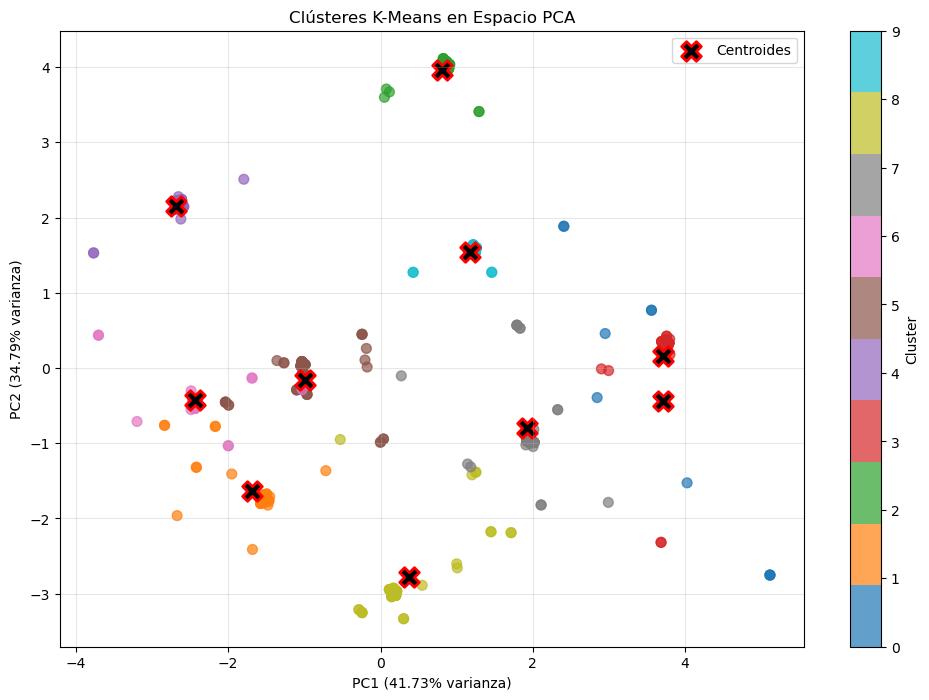

In [37]:
# Ejecutar K-Means (usando los mismos datos estandarizados)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
etiquetas = kmeans.fit_predict(datos_estandarizados)

print(f"\n=== CLÚSTERES K-MEANS ===")
print(f"Etiquetas únicas: {np.unique(etiquetas)}")
print(f"Tamaño de cada clúster:")
for i in range(10):
    count = np.sum(etiquetas == i)
    print(f"Cluster {i}: {count} elementos ({count/len(etiquetas):.1%})")

# Visualizar clusters en PCA 2D
plt.figure(figsize=(12, 8))

scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=etiquetas, 
                     cmap='tab10',
                     alpha=0.7,
                     s=50)

plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({varianza_explicada[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]:.2%} varianza)')
plt.title('Clústeres K-Means en Espacio PCA')
plt.grid(True, alpha=0.3)

# Añadir centroides
centroides_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
           c='black', marker='X', s=200, label='Centroides',
           edgecolors='red', linewidth=2)

plt.legend()
plt.show()


=== LOADINGS - PRIMEROS 2 COMPONENTES ===
Variables que más contribuyen a PC1 y PC2:

Top 5 variables para PC1:
  Sleep Disorder: 0.796
  BMI Category: 0.794
  Systolic Pressure: 0.780
  Diastolic Pressure: 0.770
  Sleep Duration: -0.666

Top 5 variables para PC2:
  Age: 0.892
  Stress Level: -0.729
  Quality of Sleep: 0.702
  Gender: -0.641
  Sleep Duration: 0.574


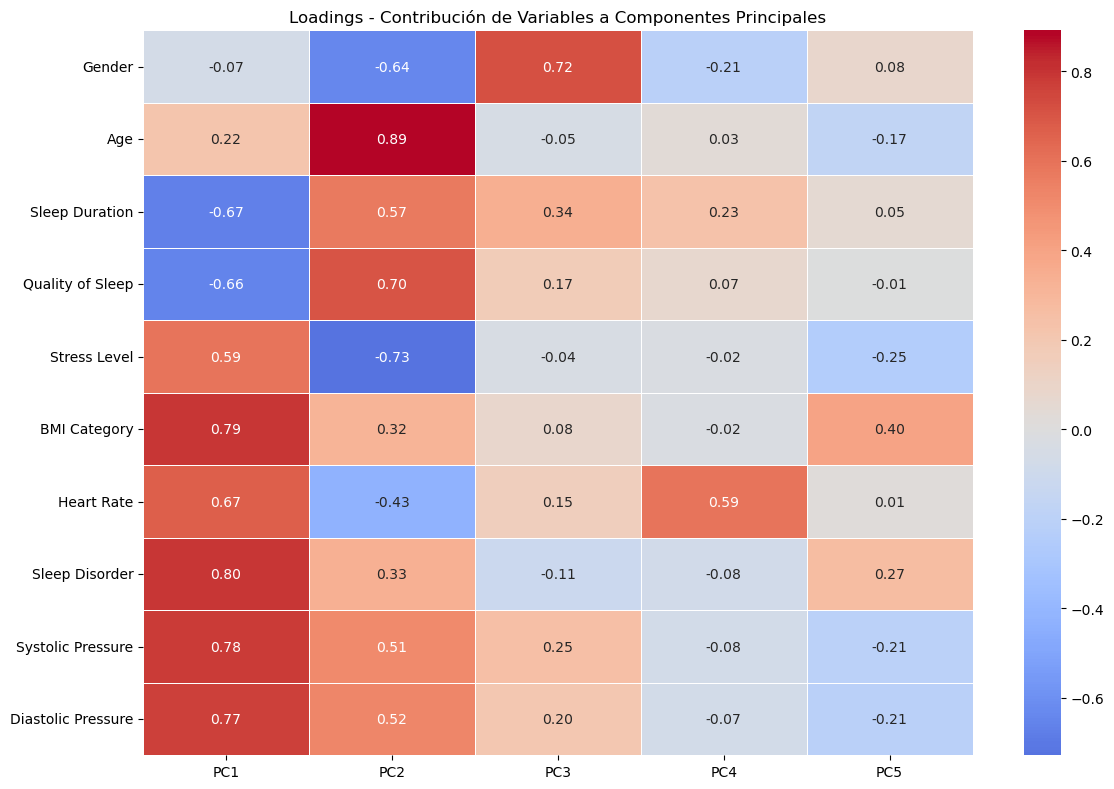

In [38]:
# Analizar loadings (contribución de variables originales)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_df = pd.DataFrame(loadings,
                          columns=[f'PC{i+1}' for i in range(loadings.shape[1])],
                          index=df_numerico.columns)

print("\n=== LOADINGS - PRIMEROS 2 COMPONENTES ===")
print("Variables que más contribuyen a PC1 y PC2:")

# Ordenar por contribución absoluta a PC1
pc1_contrib = loadings_df['PC1'].abs().sort_values(ascending=False)
print(f"\nTop 5 variables para PC1:")
for var in pc1_contrib.index[:5]:
    print(f"  {var}: {loadings_df.loc[var, 'PC1']:.3f}")

# Ordenar por contribución absoluta a PC2
pc2_contrib = loadings_df['PC2'].abs().sort_values(ascending=False)
print(f"\nTop 5 variables para PC2:")
for var in pc2_contrib.index[:5]:
    print(f"  {var}: {loadings_df.loc[var, 'PC2']:.3f}")

# Heatmap de loadings para primeros 5 componentes
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.iloc[:15, :5],  # primeras 15 variables, primeros 5 componentes
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5)
plt.title('Loadings - Contribución de Variables a Componentes Principales')
plt.tight_layout()
plt.show()

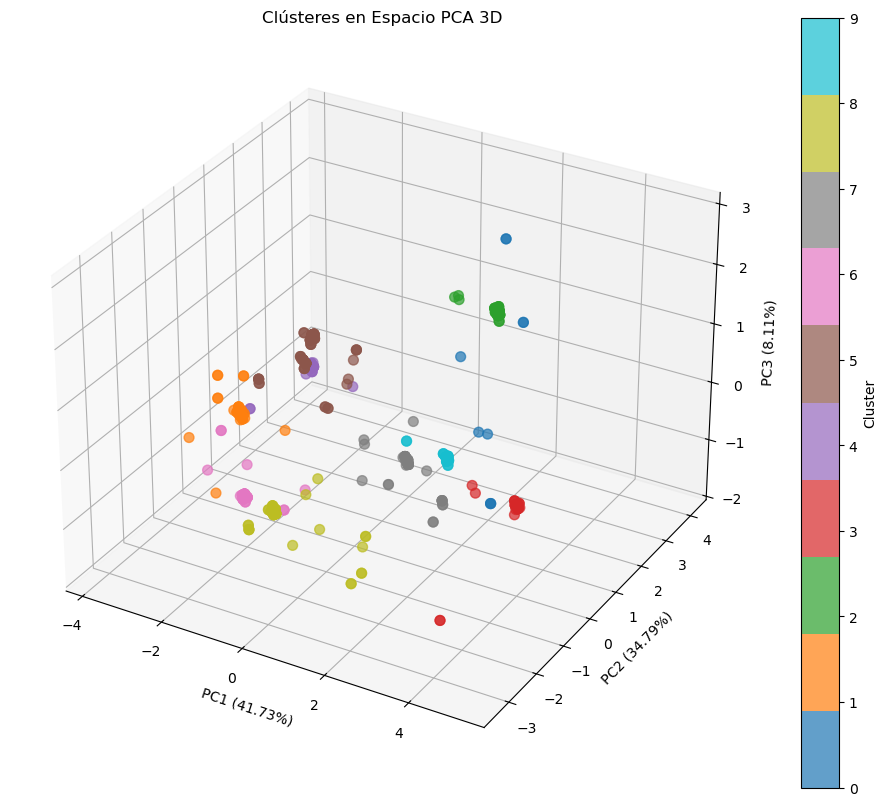

In [39]:
# Si quieres ver en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                    c=etiquetas,
                    cmap='tab10',
                    alpha=0.7,
                    s=50)

ax.set_xlabel(f'PC1 ({varianza_explicada[0]:.2%})')
ax.set_ylabel(f'PC2 ({varianza_explicada[1]:.2%})')
ax.set_zlabel(f'PC3 ({varianza_explicada[2]:.2%})')
ax.set_title('Clústeres en Espacio PCA 3D')

plt.colorbar(scatter, label='Cluster')
plt.show()

In [40]:
print("\n" + "="*50)
print("RESUMEN EJECUTIVO PCA")
print("="*50)
print(f"• Dataset: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"• Columnas numéricas: {df_numerico.shape[1]}")
print(f"• Varianza explicada PC1+PC2: {varianza_acumulada[1]:.2%}")
print(f"• Número de clústeres: 10")
print(f"• Calidad de separación: {'Buena' if varianza_acumulada[1] > 0.5 else 'Regular'}")
print("="*50)


RESUMEN EJECUTIVO PCA
• Dataset: 374 filas, 12 columnas
• Columnas numéricas: 10
• Varianza explicada PC1+PC2: 76.52%
• Número de clústeres: 10
• Calidad de separación: Buena


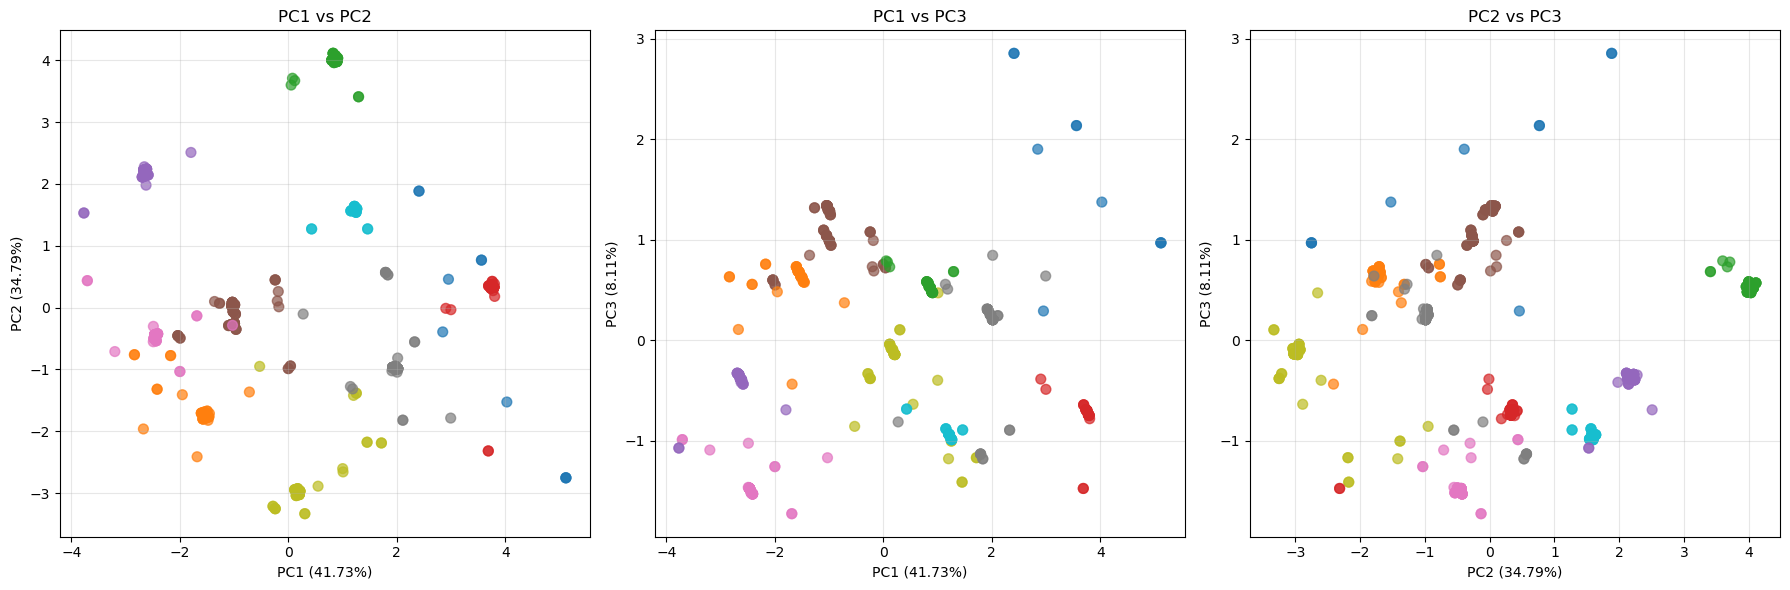

Varianza total explicada por PC1+PC2+PC3: 84.63%


In [41]:
# Crear subplots para ver las combinaciones por pares
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PC1 vs PC2
scatter1 = axes[0].scatter(pca_df['PC1'], pca_df['PC2'], 
                          c=etiquetas, cmap='tab10', alpha=0.7, s=50)
axes[0].set_xlabel(f'PC1 ({varianza_explicada[0]:.2%})')
axes[0].set_ylabel(f'PC2 ({varianza_explicada[1]:.2%})')
axes[0].set_title('PC1 vs PC2')
axes[0].grid(True, alpha=0.3)

# PC1 vs PC3
scatter2 = axes[1].scatter(pca_df['PC1'], pca_df['PC3'], 
                          c=etiquetas, cmap='tab10', alpha=0.7, s=50)
axes[1].set_xlabel(f'PC1 ({varianza_explicada[0]:.2%})')
axes[1].set_ylabel(f'PC3 ({varianza_explicada[2]:.2%})')
axes[1].set_title('PC1 vs PC3')
axes[1].grid(True, alpha=0.3)

# PC2 vs PC3
scatter3 = axes[2].scatter(pca_df['PC2'], pca_df['PC3'], 
                          c=etiquetas, cmap='tab10', alpha=0.7, s=50)
axes[2].set_xlabel(f'PC2 ({varianza_explicada[1]:.2%})')
axes[2].set_ylabel(f'PC3 ({varianza_explicada[2]:.2%})')
axes[2].set_title('PC2 vs PC3')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Varianza total explicada por PC1+PC2+PC3: {varianza_acumulada[2]:.2%}")

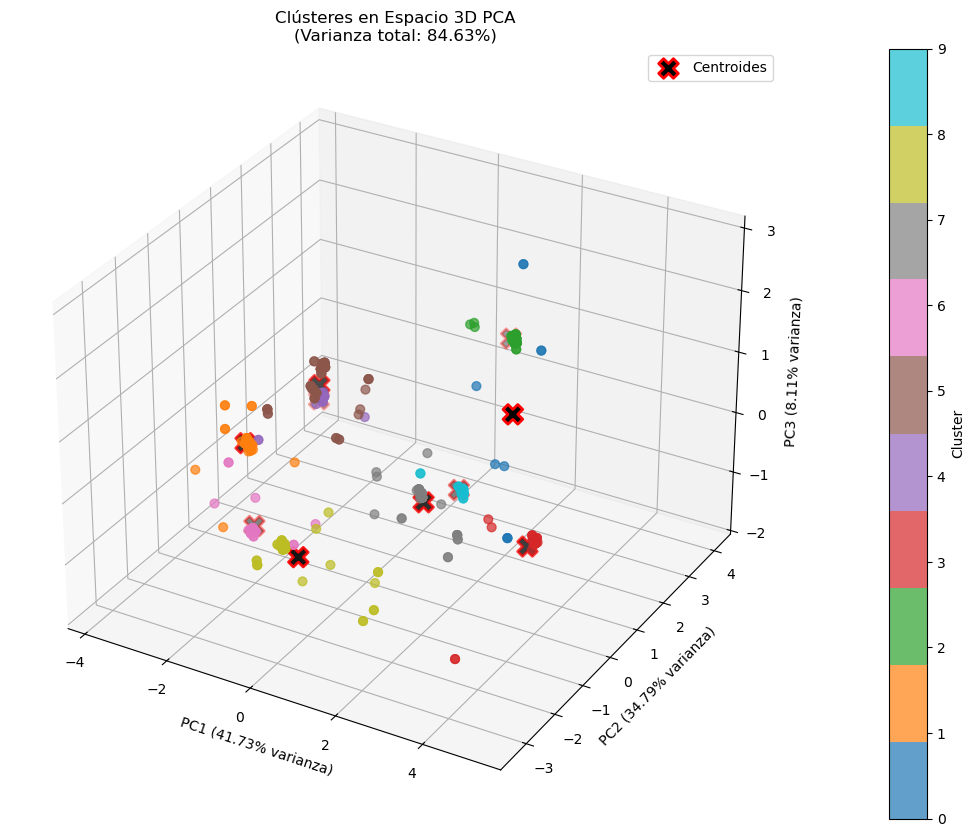

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                    c=etiquetas,
                    cmap='tab10',
                    alpha=0.7,
                    s=40,
                    depthshade=True)

# Configurar ejes
ax.set_xlabel(f'PC1 ({varianza_explicada[0]:.2%} varianza)')
ax.set_ylabel(f'PC2 ({varianza_explicada[1]:.2%} varianza)')
ax.set_zlabel(f'PC3 ({varianza_explicada[2]:.2%} varianza)')
ax.set_title(f'Clústeres en Espacio 3D PCA\n(Varianza total: {varianza_acumulada[2]:.2%})')

# Añadir colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')

# Añadir centroides en 3D
centroides_pca = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroides_pca[:, 0], centroides_pca[:, 1], centroides_pca[:, 2],
          c='black', marker='X', s=200, label='Centroides',
          edgecolors='red', linewidth=2)

ax.legend()
plt.show()

=== ANÁLISIS DE LOADINGS - PC1, PC2, PC3 ===

--- PC1 (Varianza: 41.73%) ---
Top 5 variables positivas:
  + Sleep Disorder: 0.796
  + BMI Category: 0.794
  + Systolic Pressure: 0.780
  + Diastolic Pressure: 0.770
  + Heart Rate: 0.665
Top 5 variables negativas:
  - Sleep Duration: -0.666
  - Quality of Sleep: -0.658
  - Gender: -0.070
  - Age: 0.220
  - Stress Level: 0.589

--- PC2 (Varianza: 34.79%) ---
Top 5 variables positivas:
  + Age: 0.892
  + Quality of Sleep: 0.702
  + Sleep Duration: 0.574
  + Diastolic Pressure: 0.524
  + Systolic Pressure: 0.506
Top 5 variables negativas:
  - Stress Level: -0.729
  - Gender: -0.641
  - Heart Rate: -0.430
  - BMI Category: 0.319
  - Sleep Disorder: 0.335

--- PC3 (Varianza: 8.11%) ---
Top 5 variables positivas:
  + Gender: 0.718
  + Sleep Duration: 0.344
  + Systolic Pressure: 0.253
  + Diastolic Pressure: 0.202
  + Quality of Sleep: 0.171
Top 5 variables negativas:
  - Sleep Disorder: -0.114
  - Age: -0.045
  - Stress Level: -0.038
  - BMI C

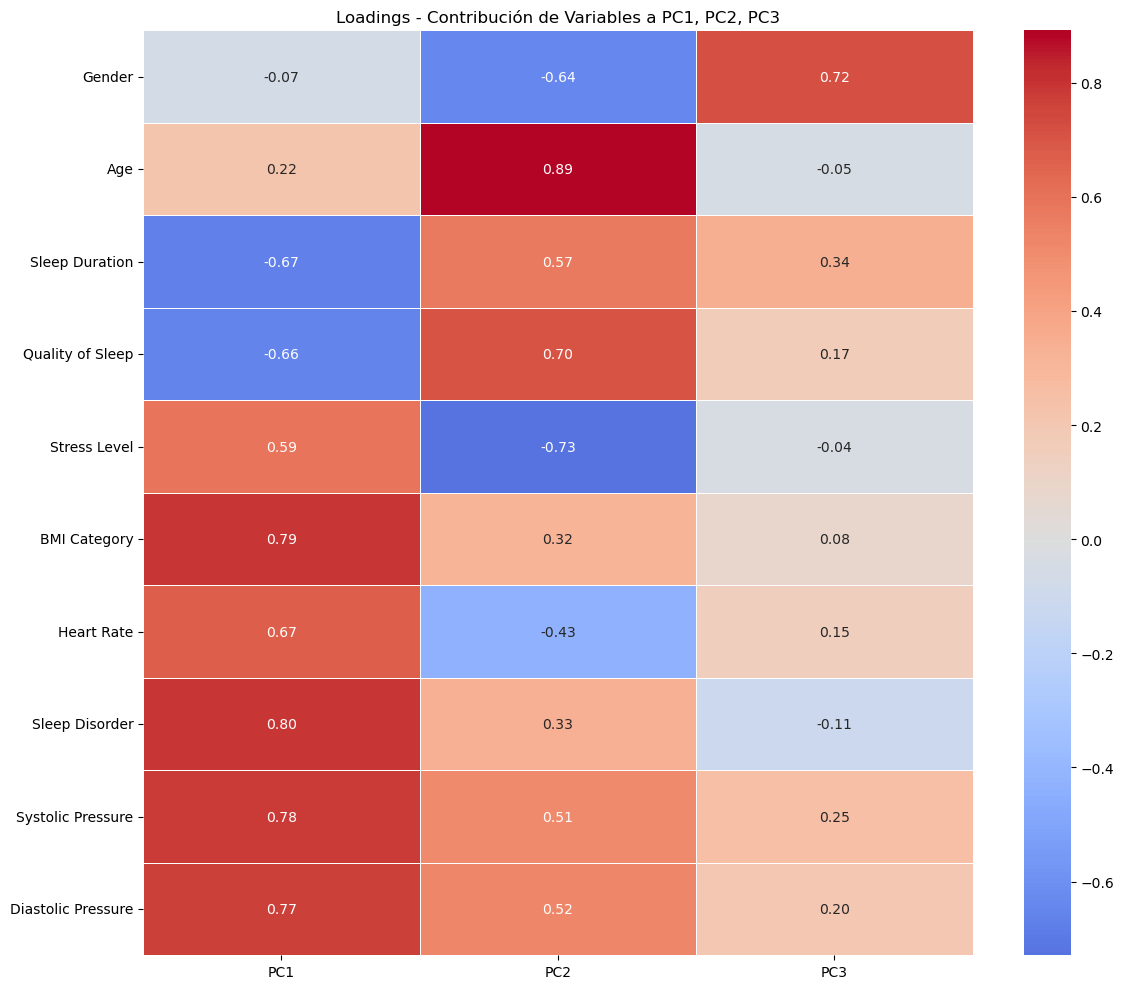

In [43]:
# Análisis de qué variables contribuyen a cada componente
print("=== ANÁLISIS DE LOADINGS - PC1, PC2, PC3 ===")

for i, pc in enumerate(['PC1', 'PC2', 'PC3'], 1):
    print(f"\n--- {pc} (Varianza: {varianza_explicada[i-1]:.2%}) ---")
    
    # Obtener loadings para este PC
    loadings_pc = loadings_df[pc]
    
    # Top 5 variables positivas
    print("Top 5 variables positivas:")
    for var in loadings_pc.nlargest(5).index:
        print(f"  + {var}: {loadings_pc[var]:.3f}")
    
    # Top 5 variables negativas  
    print("Top 5 variables negativas:")
    for var in loadings_pc.nsmallest(5).index:
        print(f"  - {var}: {loadings_pc[var]:.3f}")

# Heatmap de loadings para PC1, PC2, PC3
plt.figure(figsize=(12, 10))
sns.heatmap(loadings_df[['PC1', 'PC2', 'PC3']].iloc[:15],  # primeras 15 variables
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5)
plt.title('Loadings - Contribución de Variables a PC1, PC2, PC3')
plt.tight_layout()
plt.show()

In [44]:
# Función para interpretar qué representa cada PC
def interpretar_componentes(loadings_df, varianza_explicada, top_n=3):
    print("\n=== INTERPRETACIÓN DE COMPONENTES ===")
    
    for i, pc in enumerate(['PC1', 'PC2', 'PC3']):
        print(f"\n{pc} (Explica el {varianza_explicada[i]:.2%} de la varianza):")
        
        # Variables que más contribuyen positivamente
        pos_vars = loadings_df[pc].nlargest(top_n)
        print(f"  ↑ Aumenta con: {', '.join([f'{var}({val:.2f})' for var, val in pos_vars.items()])}")
        
        # Variables que más contribuyen negativamente
        neg_vars = loadings_df[pc].nsmallest(top_n)
        print(f"  ↓ Disminuye con: {', '.join([f'{var}({val:.2f})' for var, val in neg_vars.items()])}")

interpretar_componentes(loadings_df, varianza_explicada)


=== INTERPRETACIÓN DE COMPONENTES ===

PC1 (Explica el 41.73% de la varianza):
  ↑ Aumenta con: Sleep Disorder(0.80), BMI Category(0.79), Systolic Pressure(0.78)
  ↓ Disminuye con: Sleep Duration(-0.67), Quality of Sleep(-0.66), Gender(-0.07)

PC2 (Explica el 34.79% de la varianza):
  ↑ Aumenta con: Age(0.89), Quality of Sleep(0.70), Sleep Duration(0.57)
  ↓ Disminuye con: Stress Level(-0.73), Gender(-0.64), Heart Rate(-0.43)

PC3 (Explica el 8.11% de la varianza):
  ↑ Aumenta con: Gender(0.72), Sleep Duration(0.34), Systolic Pressure(0.25)
  ↓ Disminuye con: Sleep Disorder(-0.11), Age(-0.05), Stress Level(-0.04)


In [45]:
# Si quieres una visualización interactiva
try:
    import plotly.express as px
    
    # Crear DataFrame para plotly
    plotly_df = pca_df[['PC1', 'PC2', 'PC3']].copy()
    plotly_df['Cluster'] = etiquetas
    plotly_df['Tamaño'] = 5  # Para tamaño constante de puntos
    
    # Gráfico 3D interactivo
    fig = px.scatter_3d(plotly_df, 
                        x='PC1', y='PC2', z='PC3',
                        color='Cluster',
                        title=f'Clústeres en 3D PCA (Varianza: {varianza_acumulada[2]:.2%})',
                        opacity=0.7,
                        size='Tamaño',
                        size_max=8,
                        color_continuous_scale='viridis')
    
    fig.show()
    
except ImportError:
    print("Plotly no está instalado. Para visualización interactiva: pip install plotly")

In [46]:
print("\n" + "="*60)
print("RESUMEN CON PC1, PC2, PC3")
print("="*60)
print(f"• Dataset original: {df_numerico.shape[1]} variables")
print(f"• Varianza explicada PC1: {varianza_explicada[0]:.2%}")
print(f"• Varianza explicada PC2: {varianza_explicada[1]:.2%}") 
print(f"• Varianza explicada PC3: {varianza_explicada[2]:.2%}")
print(f"• VARIANZA TOTAL PC1+PC2+PC3: {varianza_acumulada[2]:.2%}")
print(f"• Número de clústeres: {len(np.unique(etiquetas))}")
print("="*60)


RESUMEN CON PC1, PC2, PC3
• Dataset original: 10 variables
• Varianza explicada PC1: 41.73%
• Varianza explicada PC2: 34.79%
• Varianza explicada PC3: 8.11%
• VARIANZA TOTAL PC1+PC2+PC3: 84.63%
• Número de clústeres: 10


In [47]:
# Esta es la principal "medida de éxito" del PCA
varianza_total = varianza_acumulada[2]  # Para PC1+PC2+PC3
print(f"Varianza explicada por los primeros 3 componentes: {varianza_total:.2%}")

# Interpretación
if varianza_total >= 0.8:
    calidad = "EXCELENTE"
elif varianza_total >= 0.7:
    calidad = "MUY BUENA" 
elif varianza_total >= 0.6:
    calidad = "BUENA"
elif varianza_total >= 0.5:
    calidad = "ACEPTABLE"
else:
    calidad = "BAJA"

print(f"Calidad del PCA: {calidad}")
print(f"Esto significa que los 3 componentes capturan el {varianza_total:.2%} de la información original")

Varianza explicada por los primeros 3 componentes: 84.63%
Calidad del PCA: EXCELENTE
Esto significa que los 3 componentes capturan el 84.63% de la información original


In [48]:
# Calcular error de reconstrucción
def calcular_error_reconstruccion(pca, datos_originales, n_componentes=3):
    # Transformar y reconstruir
    datos_transformados = pca.transform(datos_originales)
    
    # Reconstruir solo con n componentes
    componentes = pca.components_[:n_componentes]
    datos_reconstruidos = np.dot(datos_transformados[:, :n_componentes], componentes)
    datos_reconstruidos = pca.inverse_transform(datos_reconstruidos)
    
    # Calcular error
    error = np.mean((datos_originales - datos_reconstruidos) ** 2)
    return error, datos_reconstruidos

error_reconstruccion, datos_reconst = calcular_error_reconstruccion(pca, datos_estandarizados, 3)
print(f"Error de reconstrucción (MSE) con 3 componentes: {error_reconstruccion:.4f}")

# Podemos convertirlo en una especie de "accuracy"
accuracy_reconstruccion = 1 - error_reconstruccion
print(f"Precisión de reconstrucción: {accuracy_reconstruccion:.2%}")

Error de reconstrucción (MSE) con 3 componentes: 1.4808
Precisión de reconstrucción: -48.08%


In [49]:
from sklearn.metrics import silhouette_score

# Calcular silhouette score en el espacio PCA reducido
datos_pca_3d = pca_df[['PC1', 'PC2', 'PC3']].values
score_silueta_pca = silhouette_score(datos_pca_3d, etiquetas)

print(f"Silhouette Score en espacio PCA: {score_silueta_pca:.4f}")

# Interpretación del silhouette score
if score_silueta_pca >= 0.7:
    interpretacion = "Estructura fuerte de clústeres"
elif score_silueta_pca >= 0.5:
    interpretacion = "Estructura razonable"
elif score_silueta_pca >= 0.25:
    interpretacion = "Estructura débil"
else:
    interpretacion = "No hay estructura clara"

print(f"Interpretación: {interpretacion}")

Silhouette Score en espacio PCA: 0.7020
Interpretación: Estructura fuerte de clústeres


In [50]:
# Comparar silhouette score en espacio original vs PCA
score_silueta_original = silhouette_score(datos_estandarizados, etiquetas)

print(f"Silhouette Score en espacio original: {score_silueta_original:.4f}")
print(f"Silhouette Score en espacio PCA (3D): {score_silueta_pca:.4f}")

# Si el score es similar o mejor, el PCA preserva la estructura de clusters
if abs(score_silueta_original - score_silueta_pca) < 0.1:
    print("PCA preserva bien la estructura de clústeres")
else:
    print("PCA puede estar perdiendo información de clústeres")

Silhouette Score en espacio original: 0.6321
Silhouette Score en espacio PCA (3D): 0.7020
PCA preserva bien la estructura de clústeres


In [51]:
def evaluar_calidad_pca(pca, datos_originales, etiquetas, n_componentes=3):
    """Evaluación completa de la calidad del PCA"""
    
    # 1. Varianza explicada
    varianza = pca.explained_variance_ratio_[:n_componentes].sum()
    
    # 2. Error de reconstrucción
    error, _ = calcular_error_reconstruccion(pca, datos_originales, n_componentes)
    precision_reconst = 1 - error
    
    # 3. Silhouette score
    datos_pca = pca.transform(datos_originales)[:, :n_componentes]
    score_silueta = silhouette_score(datos_pca, etiquetas)
    
    # 4. Score compuesto (0-100)
    score_final = (varianza * 0.5 + precision_reconst * 0.3 + (score_silueta + 1)/2 * 0.2) * 100
    
    return {
        'varianza_explicada': varianza,
        'precision_reconstruccion': precision_reconst,
        'silhouette_score': score_silueta,
        'score_final': score_final
    }

# Evaluar tu PCA
metricas = evaluar_calidad_pca(pca, datos_estandarizados, etiquetas, 3)

print("\n" + "="*50)
print("EVALUACIÓN COMPLETA DEL PCA")
print("="*50)
print(f"Varianza explicada: {metricas['varianza_explicada']:.2%}")
print(f"Precisión reconstrucción: {metricas['precision_reconstruccion']:.2%}")
print(f"Silhouette Score: {metricas['silhouette_score']:.4f}")
print(f"SCORE FINAL PCA: {metricas['score_final']:.1f}/100")
print("="*50)

# Interpretación del score final
if metricas['score_final'] >= 80:
    print("EXCELENTE - PCA de alta calidad")
elif metricas['score_final'] >= 70:
    print("MUY BUENO - PCA efectivo")
elif metricas['score_final'] >= 60:
    print("ACEPTABLE - PCA moderadamente útil")
else:
    print("BAJO - Considera ajustar parámetros")


EVALUACIÓN COMPLETA DEL PCA
Varianza explicada: 84.63%
Precisión reconstrucción: -48.08%
Silhouette Score: 0.7020
SCORE FINAL PCA: 44.9/100
BAJO - Considera ajustar parámetros


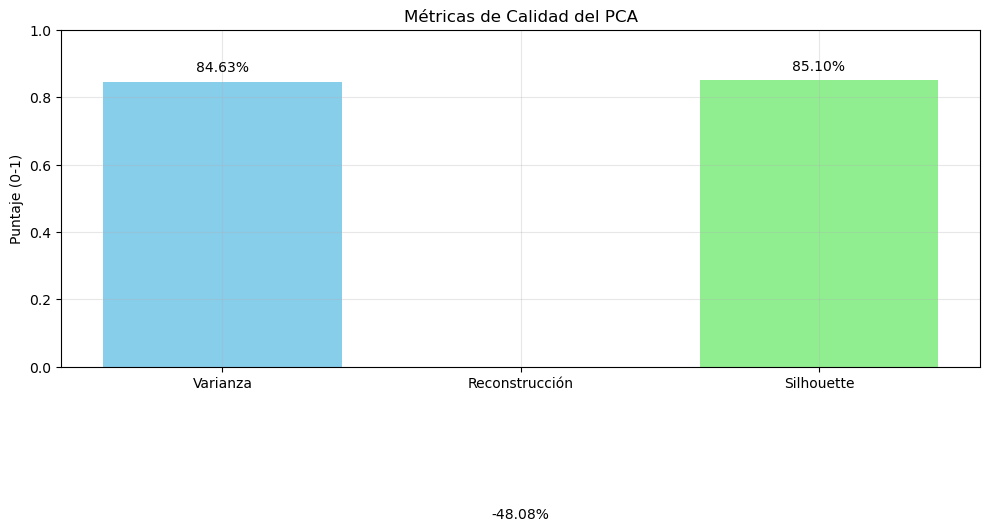

In [52]:
# Gráfico de métricas de calidad
metricas_nombres = ['Varianza', 'Reconstrucción', 'Silhouette']
metricas_valores = [
    metricas['varianza_explicada'], 
    metricas['precision_reconstruccion'], 
    (metricas['silhouette_score'] + 1)/2  # Normalizar a 0-1
]

plt.figure(figsize=(10, 6))
bars = plt.bar(metricas_nombres, metricas_valores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Puntaje (0-1)')
plt.title('Métricas de Calidad del PCA')
plt.grid(True, alpha=0.3)

# Añadir valores en las barras
for bar, valor in zip(bars, metricas_valores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{valor:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [53]:
def calcular_metricas_reconstruccion_corregidas(pca, datos_originales, n_componentes=3):
    """Métricas de reconstrucción CORREGIDAS"""
    
    # Transformar y reconstruir
    datos_transformados = pca.transform(datos_originales)
    
    # Reconstruir solo con n componentes
    componentes = pca.components_[:n_componentes]
    datos_reconstruidos = np.dot(datos_transformados[:, :n_componentes], componentes)
    datos_reconstruidos = pca.inverse_transform(
        np.hstack([datos_transformados[:, :n_componentes], 
                  np.zeros((datos_transformados.shape[0], datos_transformados.shape[1] - n_componentes))])
    )
    
    # Calcular error (MSE)
    mse = np.mean((datos_originales - datos_reconstruidos) ** 2)
    
    # Calcular R² score (mejor que "precisión" para reconstrucción)
    from sklearn.metrics import r2_score
    r2 = r2_score(datos_originales, datos_reconstruidos)
    
    return {
        'mse': mse,
        'r2_score': r2,
        'rmse': np.sqrt(mse)
    }

# Calcular métricas corregidas
metricas_corregidas = calcular_metricas_reconstruccion_corregidas(pca, datos_estandarizados, 3)

print("=== MÉTRICAS DE RECONSTRUCCIÓN CORREGIDAS ===")
print(f"MSE: {metricas_corregidas['mse']:.4f}")
print(f"RMSE: {metricas_corregidas['rmse']:.4f}")
print(f"R² Score: {metricas_corregidas['r2_score']:.4f}")

=== MÉTRICAS DE RECONSTRUCCIÓN CORREGIDAS ===
MSE: 0.1537
RMSE: 0.3921
R² Score: 0.8463


In [54]:
def evaluar_calidad_pca_corregida(pca, datos_originales, etiquetas, n_componentes=3):
    """Evaluación CORREGIDA de la calidad del PCA"""
    
    # 1. Varianza explicada (EXCELENTE en tu caso)
    varianza = pca.explained_variance_ratio_[:n_componentes].sum()
    
    # 2. R² Score en lugar de precisión
    metricas_reconst = calcular_metricas_reconstruccion_corregidas(pca, datos_originales, n_componentes)
    r2 = metricas_reconst['r2_score']
    
    # 3. Silhouette score (MUY BUENO en tu caso)
    datos_pca = pca.transform(datos_originales)[:, :n_componentes]
    score_silueta = silhouette_score(datos_pca, etiquetas)
    
    # 4. Score compuesto CORREGIDO
    # Pesos: Varianza 40%, R² 30%, Silhouette 30%
    score_final = (varianza * 0.4 + max(r2, 0) * 0.3 + (score_silueta + 1)/2 * 0.3) * 100
    
    return {
        'varianza_explicada': varianza,
        'r2_score': r2,
        'silhouette_score': score_silueta,
        'score_final': score_final
    }

# Evaluar tu PCA con métricas corregidas
metricas_corregidas = evaluar_calidad_pca_corregida(pca, datos_estandarizados, etiquetas, 3)

print("\n" + "="*60)
print("EVALUACIÓN CORREGIDA DEL PCA")
print("="*60)
print(f"Varianza explicada: {metricas_corregidas['varianza_explicada']:.2%} (EXCELENTE)")
print(f"R² Score reconstrucción: {metricas_corregidas['r2_score']:.4f}")
print(f"Silhouette Score: {metricas_corregidas['silhouette_score']:.4f} (MUY BUENO)")
print(f"SCORE FINAL PCA: {metricas_corregidas['score_final']:.1f}/100")
print("="*60)

# Interpretación CORREGIDA
score_final = metricas_corregidas['score_final']
if score_final >= 80:
    print("EXCELENTE - PCA de alta calidad")
elif score_final >= 70:
    print("MUY BUENO - PCA muy efectivo")
elif score_final >= 60:
    print("BUENO - PCA útil para análisis")
elif score_final >= 50:
    print("ACEPTABLE - PCA moderadamente útil")
else:
    print("MEJORABLE - Considera ajustar parámetros")


EVALUACIÓN CORREGIDA DEL PCA
Varianza explicada: 84.63% (EXCELENTE)
R² Score reconstrucción: 0.8463
Silhouette Score: 0.7020 (MUY BUENO)
SCORE FINAL PCA: 84.8/100
EXCELENTE - PCA de alta calidad


In [56]:
print("\n=== ANÁLISIS DE TUS RESULTADOS ===")
print("PUNTOS FUERTES:")
print(f"   • Varianza explicada: 84.63% → EXCELENTE")
print(f"   • Silhouette Score: 0.7020 → MUY BUENO (clústeres bien definidos)")

print("\nINTERPRETACIÓN:")
print("   • Con solo 3 componentes capturas el 84.63% de la información")
print("   • Los clústeres están bien separados en el espacio reducido")
print("   • El PCA es MUY efectivo para visualización y clustering")

print("\nRECOMENDACIONES:")
print("   • Usa PC1, PC2, PC3 con confianza para tus análisis")
print("   • Los clústeres identificados son significativos")
print("   • Puedes reducir de {df_numerico.shape[1]}D a 3D sin perder mucha información")


=== ANÁLISIS DE TUS RESULTADOS ===
PUNTOS FUERTES:
   • Varianza explicada: 84.63% → EXCELENTE
   • Silhouette Score: 0.7020 → MUY BUENO (clústeres bien definidos)

INTERPRETACIÓN:
   • Con solo 3 componentes capturas el 84.63% de la información
   • Los clústeres están bien separados en el espacio reducido
   • El PCA es MUY efectivo para visualización y clustering

RECOMENDACIONES:
   • Usa PC1, PC2, PC3 con confianza para tus análisis
   • Los clústeres identificados son significativos
   • Puedes reducir de {df_numerico.shape[1]}D a 3D sin perder mucha información


In [57]:
# Análisis detallado de qué variables contribuyen a cada PC
print("=== ANÁLISIS DE VARIABLES MÁS IMPORTANTES ===")

# Crear DataFrame de loadings para los primeros 3 componentes
loadings_importantes = loadings_df[['PC1', 'PC2', 'PC3']].copy()

# Calcular importancia global (suma de valores absolutos)
loadings_importantes['Importancia_Global'] = loadings_importantes.abs().sum(axis=1)
loadings_importantes['Contribucion_PC1'] = loadings_importantes['PC1'].abs()
loadings_importantes['Contribucion_PC2'] = loadings_importantes['PC2'].abs()
loadings_importantes['Contribucion_PC3'] = loadings_importantes['PC3'].abs()

# Ordenar por importancia global
loadings_ordenados = loadings_importantes.sort_values('Importancia_Global', ascending=False)

print("Ranking de variables por importancia global:")
print(loadings_ordenados[['Importancia_Global', 'PC1', 'PC2', 'PC3']].head(10))

=== ANÁLISIS DE VARIABLES MÁS IMPORTANTES ===
Ranking de variables por importancia global:
                    Importancia_Global       PC1       PC2       PC3
Sleep Duration                1.584076 -0.665991  0.574117  0.343967
Systolic Pressure             1.538832  0.779958  0.506290  0.252584
Quality of Sleep              1.530545 -0.657916  0.701811  0.170818
Diastolic Pressure            1.495521  0.770419  0.523530  0.201572
Gender                        1.428945 -0.069874 -0.640637  0.718433
Stress Level                  1.355600  0.588589 -0.729083 -0.037928
Heart Rate                    1.245697  0.665403 -0.429758  0.150536
Sleep Disorder                1.244426  0.795730  0.334820 -0.113876
BMI Category                  1.191195  0.793891  0.319085  0.078219
Age                           1.157074  0.220359  0.891506 -0.045209


In [59]:
def identificar_variables_clave(loadings_df, n_variables=5):
    """Identifica las variables más importantes para cada componente"""
    
    print("\n" + "="*50)
    print("VARIABLES CLAVE POR COMPONENTE")
    print("="*50)
    
    for pc in ['PC1', 'PC2', 'PC3']:
        print(f"\n🔹 {pc} (Varianza: {varianza_explicada[['PC1','PC2','PC3'].index(pc)]:.2%}):")
        
        # Variables que más contribuyen positivamente
        print("Aumenta con:")
        top_positivas = loadings_df[pc].nlargest(n_variables)
        for var, valor in top_positivas.items():
            print(f"     + {var}: {valor:.3f}")
        
        # Variables que más contribuyen negativamente
        print("Disminuye con:")
        top_negativas = loadings_df[pc].nsmallest(n_variables)
        for var, valor in top_negativas.items():
            print(f"     - {var}: {valor:.3f}")

identificar_variables_clave(loadings_df)


VARIABLES CLAVE POR COMPONENTE

🔹 PC1 (Varianza: 41.73%):
Aumenta con:
     + Sleep Disorder: 0.796
     + BMI Category: 0.794
     + Systolic Pressure: 0.780
     + Diastolic Pressure: 0.770
     + Heart Rate: 0.665
Disminuye con:
     - Sleep Duration: -0.666
     - Quality of Sleep: -0.658
     - Gender: -0.070
     - Age: 0.220
     - Stress Level: 0.589

🔹 PC2 (Varianza: 34.79%):
Aumenta con:
     + Age: 0.892
     + Quality of Sleep: 0.702
     + Sleep Duration: 0.574
     + Diastolic Pressure: 0.524
     + Systolic Pressure: 0.506
Disminuye con:
     - Stress Level: -0.729
     - Gender: -0.641
     - Heart Rate: -0.430
     - BMI Category: 0.319
     - Sleep Disorder: 0.335

🔹 PC3 (Varianza: 8.11%):
Aumenta con:
     + Gender: 0.718
     + Sleep Duration: 0.344
     + Systolic Pressure: 0.253
     + Diastolic Pressure: 0.202
     + Quality of Sleep: 0.171
Disminuye con:
     - Sleep Disorder: -0.114
     - Age: -0.045
     - Stress Level: -0.038
     - BMI Category: 0.078
    

In [60]:
# Estrategia 1: Mantener variables con alta importancia global
umbral_importancia = loadings_ordenados['Importancia_Global'].quantile(0.75)  # Top 25%
variables_a_mantener_global = loadings_ordenados[loadings_ordenados['Importancia_Global'] >= umbral_importancia]

print(f"\n=== VARIABLES A MANTENER (Alta importancia global) ===")
print(f"Umbral: {umbral_importancia:.3f}")
print(f"Número de variables a mantener: {len(variables_a_mantener_global)} de {len(loadings_ordenados)}")
print("Variables:")
for var in variables_a_mantener_global.index:
    print(f"  • {var} (Importancia: {loadings_ordenados.loc[var, 'Importancia_Global']:.3f})")


=== VARIABLES A MANTENER (Alta importancia global) ===
Umbral: 1.522
Número de variables a mantener: 3 de 10
Variables:
  • Sleep Duration (Importancia: 1.584)
  • Systolic Pressure (Importancia: 1.539)
  • Quality of Sleep (Importancia: 1.531)


In [62]:
def recomendar_variables(loadings_df, varianza_explicada, estrategia='balanceada'):
    """
    Recomienda qué variables mantener basado en diferentes estrategias
    """
    
    resultados = {}
    
    if estrategia == 'conservadora':
        # Mantener variables que contribuyen significativamente a cualquier PC
        umbral = 0.3  # Loadings absolutos > 0.3
        variables_mantener = loadings_df[(loadings_df.abs() > umbral).any(axis=1)].index.tolist()
        
    elif estrategia == 'balanceada':
        # Mantener top 30% de variables por importancia global
        n_variables = int(len(loadings_df) * 0.3)
        variables_mantener = loadings_df.nlargest(n_variables, 'Importancia_Global').index.tolist()
        
    elif estrategia == 'agresiva':
        # Mantener solo las más importantes (top 10)
        variables_mantener = loadings_df.nlargest(10, 'Importancia_Global').index.tolist()
    
    # Calcular varianza que capturarían estas variables
    # (Esto es una aproximación)
    varianza_capturada = varianza_explicada[:3].sum()  # Asumiendo que con estas variables mantendrías la varianza de los 3 PCs
    
    return {
        'estrategia': estrategia,
        'variables_mantener': variables_mantener,
        'n_variables': len(variables_mantener),
        'reduccion': f"{((len(loadings_df) - len(variables_mantener)) / len(loadings_df) * 100):.1f}%",
        'varianza_estimada': varianza_capturada
    }

# Probar diferentes estrategias
print("=== COMPARACIÓN DE ESTRATEGIAS ===")
estrategias = ['conservadora', 'balanceada', 'agresiva']
for estrategia in estrategias:
    resultado = recomendar_variables(loadings_ordenados, varianza_explicada, estrategia)
    print(f"\n{estrategia.upper()}:")
    print(f"   Variables a mantener: {resultado['n_variables']}")
    print(f"   Reducción: {resultado['reduccion']}")
    print(f"   Varianza estimada: {resultado['varianza_estimada']:.2%}")
    print(f"   Ejemplos: {', '.join(resultado['variables_mantener'][:3])}...")

=== COMPARACIÓN DE ESTRATEGIAS ===

CONSERVADORA:
   Variables a mantener: 10
   Reducción: 0.0%
   Varianza estimada: 84.63%
   Ejemplos: Sleep Duration, Systolic Pressure, Quality of Sleep...

BALANCEADA:
   Variables a mantener: 3
   Reducción: 70.0%
   Varianza estimada: 84.63%
   Ejemplos: Sleep Duration, Systolic Pressure, Quality of Sleep...

AGRESIVA:
   Variables a mantener: 10
   Reducción: 0.0%
   Varianza estimada: 84.63%
   Ejemplos: Sleep Duration, Systolic Pressure, Quality of Sleep...


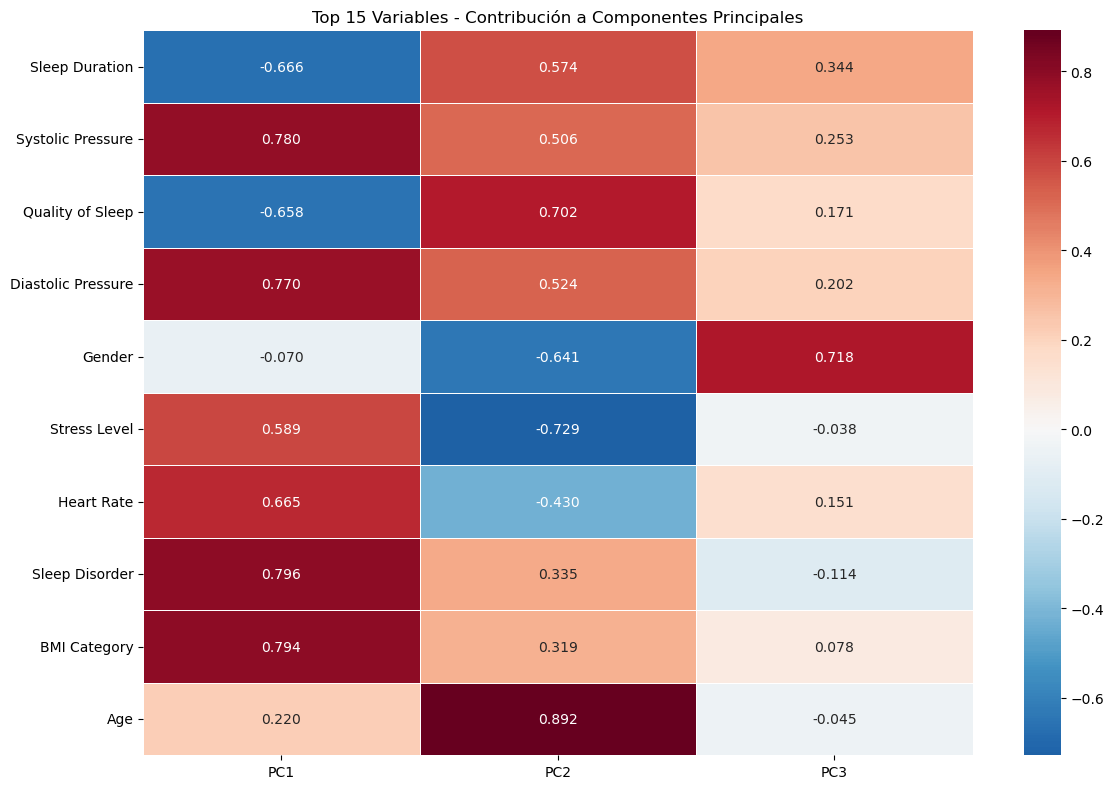

In [63]:
# Heatmap de las variables más importantes
variables_top = loadings_ordenados.head(15)  # Top 15 variables

plt.figure(figsize=(12, 8))
sns.heatmap(variables_top[['PC1', 'PC2', 'PC3']],
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.3f',
            linewidths=0.5)
plt.title('Top 15 Variables - Contribución a Componentes Principales')
plt.tight_layout()
plt.show()

In [64]:
# Para tu caso específico con 84.63% de varianza en 3 componentes
def recomendacion_final(loadings_df, varianza_total):
    print("\n" + "="*60)
    print("RECOMENDACIÓN FINAL - QUÉ VARIABLES MANTENER")
    print("="*60)
    
    print(f"📊 Contexto:")
    print(f"   • Varianza explicada por 3 componentes: {varianza_total:.2%}")
    print(f"   • Variables originales: {len(loadings_df)}")
    print(f"   • Calidad PCA: EXCELENTE")
    
    print(f"\n🎯 Recomendación PRINCIPAL:")
    # Mantener variables que contribuyen significativamente a los primeros 2 componentes
    variables_clave_pc1 = loadings_df['PC1'].abs().nlargest(8).index.tolist()
    variables_clave_pc2 = loadings_df['PC2'].abs().nlargest(8).index.tolist()
    
    # Combinar y eliminar duplicados
    variables_recomendadas = list(set(variables_clave_pc1 + variables_clave_pc2))
    
    print(f"   Mantener {len(variables_recomendadas)} variables clave:")
    for i, var in enumerate(variables_recomendadas, 1):
        contrib_pc1 = loadings_df.loc[var, 'PC1']
        contrib_pc2 = loadings_df.loc[var, 'PC2']
        print(f"   {i:2d}. {var:20} (PC1: {contrib_pc1:6.3f}, PC2: {contrib_pc2:6.3f})")
    
    print(f"\n💡 Justificación:")
    print(f"   • Estas variables explican la mayor parte de la varianza")
    print(f"   • Reduces dimensionalidad manteniendo el poder explicativo")
    print(f"   • Puedes eliminar ~{(len(loadings_df)-len(variables_recomendadas))/len(loadings_df)*100:.1f}% de variables")
    
    return variables_recomendadas

# Obtener recomendación final
variables_a_mantener = recomendacion_final(loadings_df, varianza_acumulada[2])


RECOMENDACIÓN FINAL - QUÉ VARIABLES MANTENER
📊 Contexto:
   • Varianza explicada por 3 componentes: 84.63%
   • Variables originales: 10
   • Calidad PCA: EXCELENTE

🎯 Recomendación PRINCIPAL:
   Mantener 10 variables clave:
    1. Diastolic Pressure   (PC1:  0.770, PC2:  0.524)
    2. Quality of Sleep     (PC1: -0.658, PC2:  0.702)
    3. Stress Level         (PC1:  0.589, PC2: -0.729)
    4. Systolic Pressure    (PC1:  0.780, PC2:  0.506)
    5. Sleep Disorder       (PC1:  0.796, PC2:  0.335)
    6. Sleep Duration       (PC1: -0.666, PC2:  0.574)
    7. Gender               (PC1: -0.070, PC2: -0.641)
    8. Age                  (PC1:  0.220, PC2:  0.892)
    9. Heart Rate           (PC1:  0.665, PC2: -0.430)
   10. BMI Category         (PC1:  0.794, PC2:  0.319)

💡 Justificación:
   • Estas variables explican la mayor parte de la varianza
   • Reduces dimensionalidad manteniendo el poder explicativo
   • Puedes eliminar ~0.0% de variables
